<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_4_2/blob/main/0209%20Day9/13_%EC%95%99%EC%83%81%EB%B8%94%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 앙상블(Ensemble)**

**머신러닝 앙상블이란 여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**
* 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측 결과를 평균하여 예측

### **1-1. 앙상블 기법의 종류**
* 보팅(Voting) : 투표를 통해 결과 도출
* 배깅(Bagging) : 샘플 중복 생성을 통해 결과 도출
* 부스팅(Boosting) : 이전 오차를 보완하면서 가중치 부여
* 스태킹(Stacking) : 여러 모델을 기반으로 예측된 결과를 통해 메타(meta) 모델이 다시 한번 예측

### **보팅(Voting)**
* Voting은 다른 알고리즘 model을 조합해서 사용
* Hard Vote : 결과물에 대한 최종 값을 투표해서 결정
* Soft Vote : 최종 결과물이 나올 확률 값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종 값을 도출

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(suppress=True)

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [5]:
df['MEDV'] = data['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [10]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59
187,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56


In [11]:
y_train.head()

260    33.8
187    32.0
185    29.6
466    19.0
337    18.5
Name: MEDV, dtype: float64

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

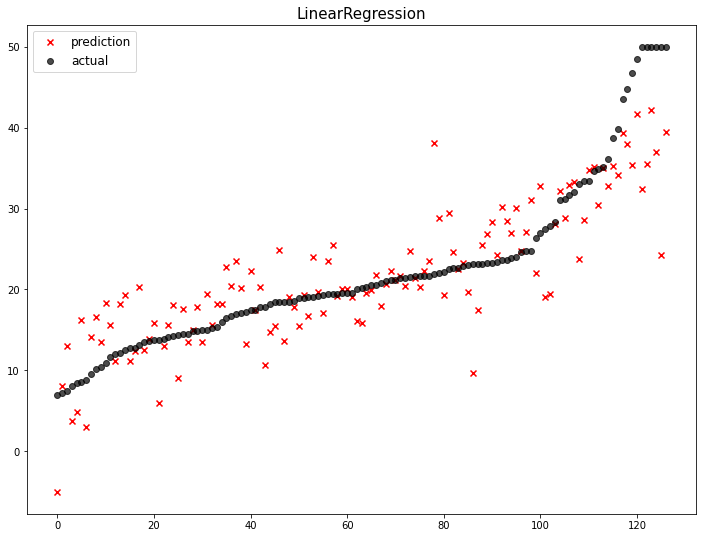

              model        mse
0  LinearRegression  32.656539


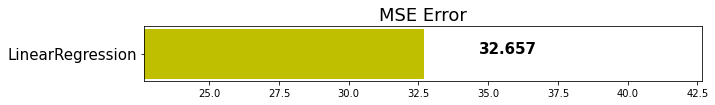

In [15]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

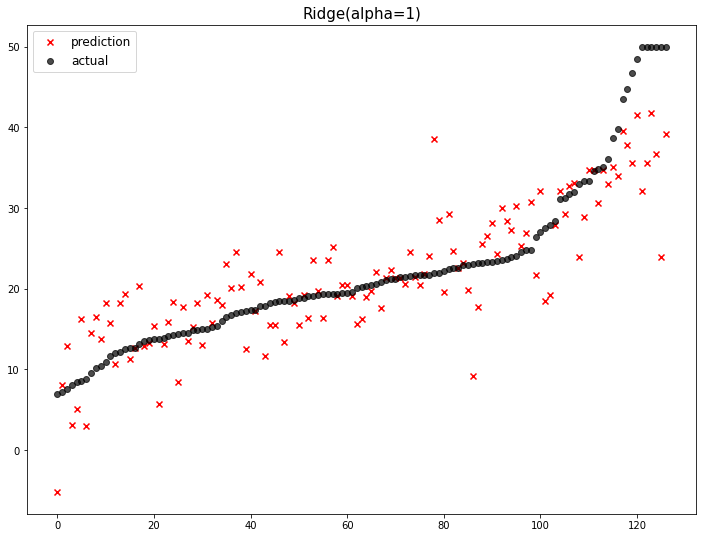

              model        mse
0    Ridge(alpha=1)  33.325646
1  LinearRegression  32.656539


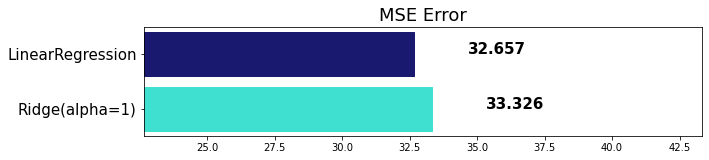

In [16]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

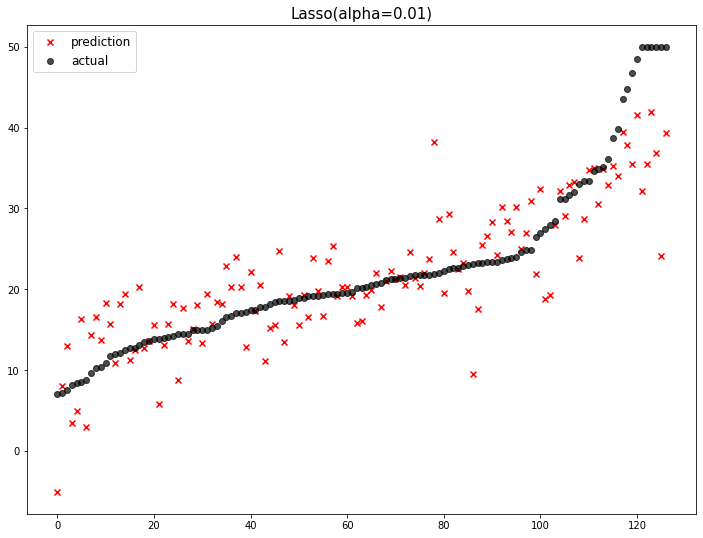

               model        mse
0     Ridge(alpha=1)  33.325646
1  Lasso(alpha=0.01)  32.947159
2   LinearRegression  32.656539


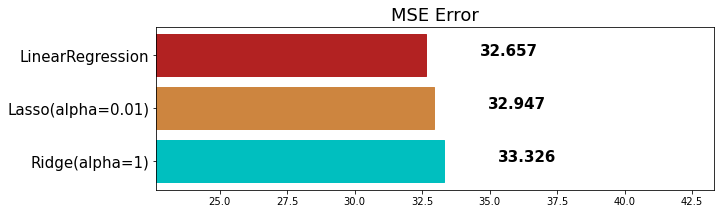

In [17]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

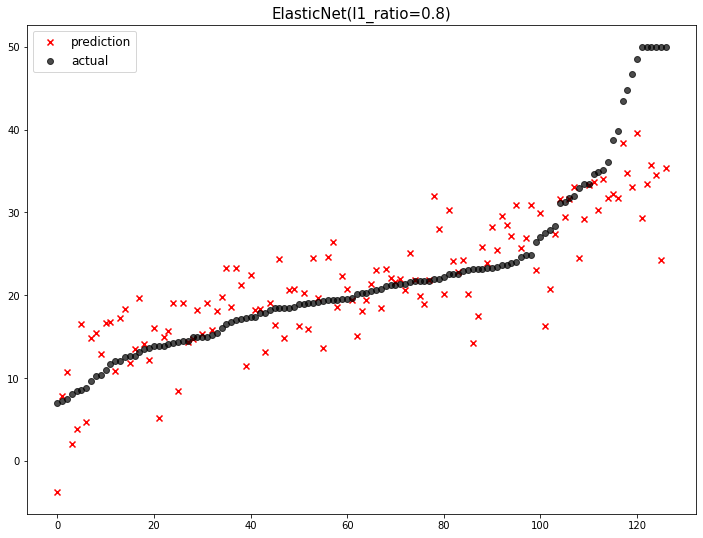

                      model        mse
0  ElasticNet(l1_ratio=0.8)  35.990578
1            Ridge(alpha=1)  33.325646
2         Lasso(alpha=0.01)  32.947159
3          LinearRegression  32.656539


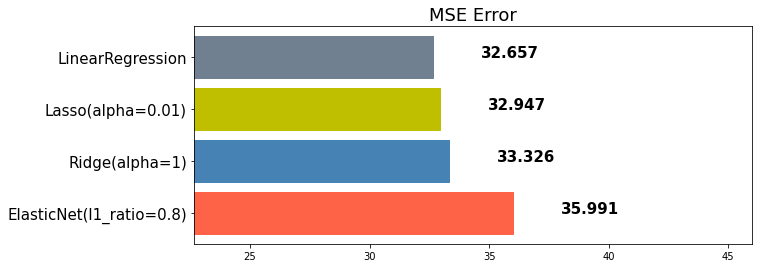

In [18]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)

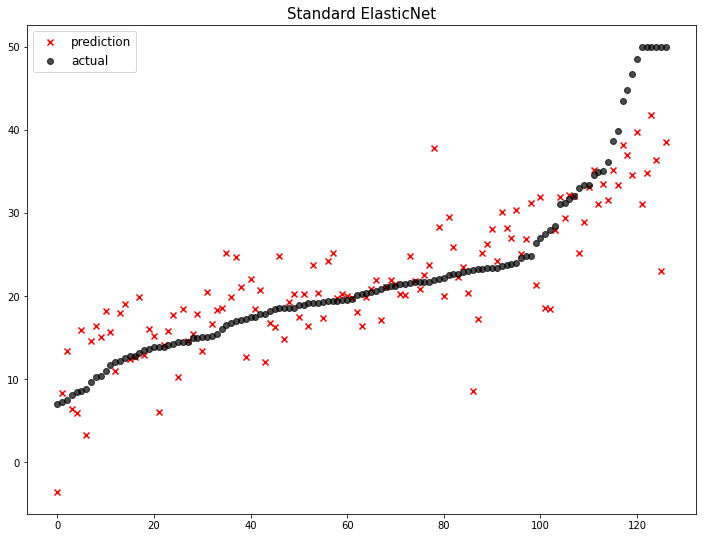

                      model        mse
0  ElasticNet(l1_ratio=0.8)  35.990578
1       Standard ElasticNet  34.419595
2            Ridge(alpha=1)  33.325646
3         Lasso(alpha=0.01)  32.947159
4          LinearRegression  32.656539


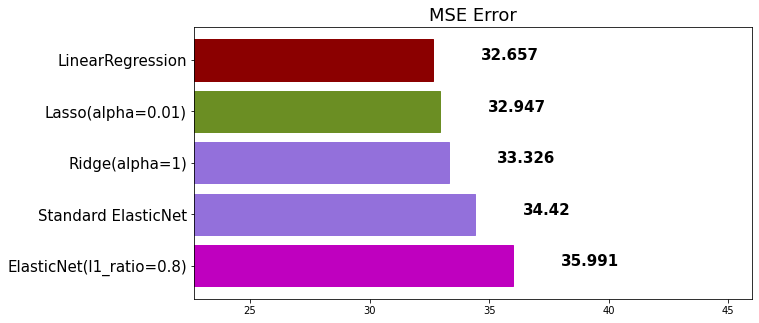

In [19]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+01, tolerance: 2.953e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


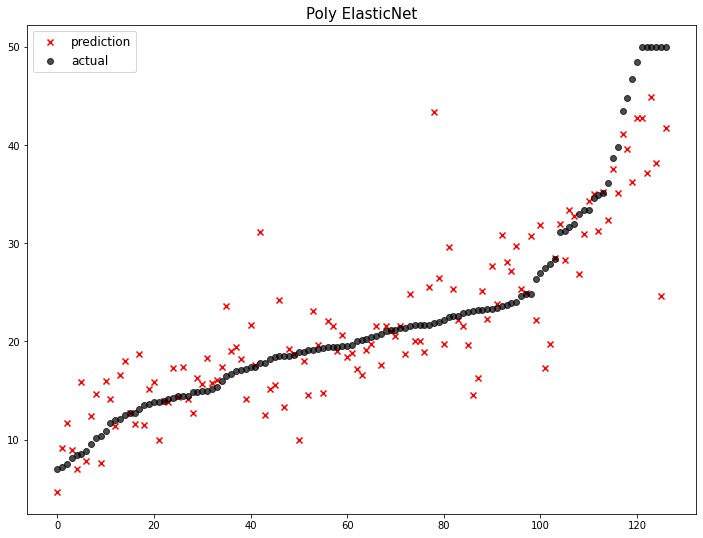

                      model        mse
0  ElasticNet(l1_ratio=0.8)  35.990578
1       Standard ElasticNet  34.419595
2            Ridge(alpha=1)  33.325646
3         Lasso(alpha=0.01)  32.947159
4          LinearRegression  32.656539
5           Poly ElasticNet  26.390820


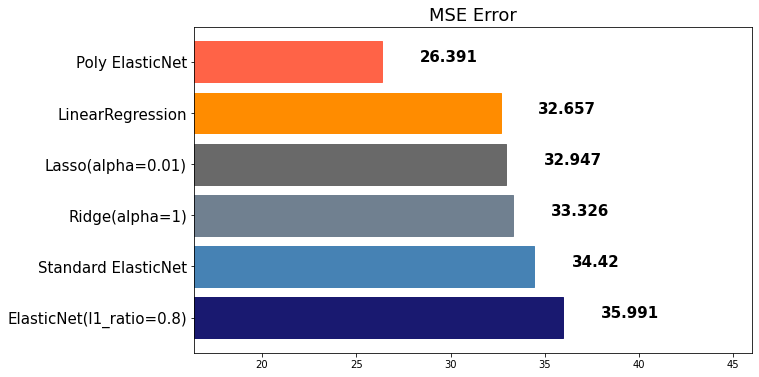

In [20]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [21]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [22]:
# tuple 형태로 모델을 반드시 정의해야 함
single_models = [
  ('linear_reg', linear_reg),
  ('ridge', ridge),
  ('lasso', lasso),
  ('elasticnet_pipeline', elasticnet_pipeline),
  ('poly_pipeline', poly_pipeline)
]

In [23]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                       

### **배깅(Bagging)**
* Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용